### Importing Required Libraries:

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Importing the dataset:

In [4]:
sales_data = pd.read_excel(r"C:\Users\hassa\Downloads\Final.xlsx", parse_dates=['DateKey','Invoice Date', 'Promised Delivery Date'])
sales_data

,Custkey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,...,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M,customer_name,City
0,10016609.0,2019-12-31,398.73,2019-12-31,329568.0,p01,15640,super vegetable oil,1000.0,163.47,...,418.62,817.35,102.99,315.63,83.72400,5.0,176.0,ea,Oscar Hall,Gloucester
1,10016609.0,2019-12-31,268.67,2019-12-31,329569.0,p01,31681,golden fajita french fries,7000.0,275.37,...,282.07,550.74,117.45,164.62,141.03500,2.0,176.0,ea,Oscar Hall,Leeds
2,10016609.0,2019-12-31,398.73,2019-12-31,329569.0,p01,15640,super vegetable oil,4000.0,163.47,...,418.62,817.35,102.99,315.63,83.72400,5.0,176.0,ea,Oscar Hall,St Albans
3,10016609.0,2019-12-31,466.45,2019-12-31,329569.0,p01,13447,high top oranges,3000.0,119.52,...,489.71,956.16,213.29,276.42,61.21375,8.0,176.0,ea,Oscar Hall,Coventry
4,10016609.0,2019-12-31,515.51,2019-12-31,329569.0,p01,36942,tell tale new potatos,9000.0,264.18,...,541.21,1056.72,290.56,250.65,135.30250,4.0,176.0,ea,Oscar Hall,Preston
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29574,NaN,2017-02-06,NaN,2017-02-06,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ea,Lindsey Davis,Winchester
29575,NaN,2017-02-06,NaN,2017-02-06,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ea,Lindsey Davis,Bradford
29576,NaN,2017-02-06,NaN,2017-02-06,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ea,Lindsey Davis,Sunderland
29577,NaN,2017-02-06,NaN,2017-02-06,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ea,Lindsey Davis,London


#  Checking the Shape


In [5]:
sales_data.shape

(29579, 22)

In [6]:
sales_data.columns

Index(['Custkey', 'DateKey', 'Discount Amount', 'Invoice Date',
       'Invoice Number', 'Item Class', 'Item Number', 'Item', 'Line Number',
       'List Price', 'Order Number', 'Promised Delivery Date', 'Sales Amount',
       'Sales Amount Based on List Price', 'Sales Cost Amount',
       'Sales Margin Amount', 'Sales Price', 'Sales Quantity', 'Sales Rep',
       'U/M', 'customer_name', 'City'],
      dtype='object')

In [7]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29579 entries, 0 to 29578
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Custkey                           20530 non-null  float64       
 1   DateKey                           29579 non-null  datetime64[ns]
 2   Discount Amount                   20530 non-null  float64       
 3   Invoice Date                      29579 non-null  datetime64[ns]
 4   Invoice Number                    20530 non-null  float64       
 5   Item Class                        20530 non-null  object        
 6   Item Number                       20530 non-null  object        
 7   Item                              20530 non-null  object        
 8   Line Number                       20530 non-null  float64       
 9   List Price                        20530 non-null  float64       
 10  Order Number                      20530 non-nu

# Checking no. of Null Values



In [8]:
# Checking no. of Null Values
sales_data.isnull().sum()

Custkey                             9049
DateKey                                0
Discount Amount                     9049
Invoice Date                           0
Invoice Number                      9049
Item Class                          9049
Item Number                         9049
Item                                9049
Line Number                         9049
List Price                          9049
Order Number                        9049
Promised Delivery Date                 0
Sales Amount                        9049
Sales Amount Based on List Price    9049
Sales Cost Amount                   9049
Sales Margin Amount                 9049
Sales Price                         9049
Sales Quantity                      9049
Sales Rep                           9049
U/M                                    0
customer_name                          0
City                                   0
dtype: int64

# Copy the data 
* We made a backup to modify the data and keep the original version

In [9]:
sales_data01 = sales_data.copy()

In [10]:
sales_data01['Item Class'].value_counts()

Item Class
p01    20526
po1        4
Name: count, dtype: int64

# Removing Null Values


In [11]:
sales_data01.dropna(subset=['Discount Amount','Sales Price', 'Item Number'],inplace=True)

# Generating descriptive statistics


In [12]:
sales_data01.describe()

,Custkey,DateKey,Discount Amount,Invoice Date,Invoice Number,Line Number,List Price,Order Number,Promised Delivery Date,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep
count,2.053000e+04,20530,20530.00000,20530,20530.000000,20530.000000,20530.000000,20530.000000,20530,20530.000000,20530.000000,20530.000000,20530.000000,20530.000000,20530.000000,20530.000000
mean,1.001711e+07,2018-12-31 12:34:55.820750336,1853.13913,2018-12-31 12:34:55.820750336,313769.867706,23923.948855,520.194307,110849.287141,2018-12-31 10:34:29.868485120,2699.807058,4552.946188,1625.055904,1074.751154,278.311947,44.164296,137.409937
min,1.000045e+07,2017-09-26 00:00:00,-245587.97000,2017-09-26 00:00:00,300700.000000,1000.000000,0.000000,100838.000000,2017-09-25 00:00:00,200.010000,0.000000,0.000000,-3932.930000,0.337341,1.000000,103.000000
25%,1.001223e+07,2018-02-04 00:00:00,260.11000,2018-02-04 00:00:00,306228.250000,3000.000000,181.560000,104880.750000,2018-02-03 06:00:00,304.010000,570.380000,171.370000,123.570000,97.482917,2.000000,113.000000
50%,1.001919e+07,2019-04-09 00:00:00,467.62000,2019-04-09 00:00:00,312338.000000,12000.000000,325.190000,109440.000000,2019-04-12 00:00:00,550.440000,1015.500000,313.120000,238.885000,180.775000,3.000000,132.000000
75%,1.002246e+07,2019-08-25 00:00:00,1059.94000,2019-08-25 00:00:00,317716.250000,31000.000000,824.960000,113919.000000,2019-08-25 00:00:00,1266.470000,2321.400000,705.130000,551.537500,447.040000,8.000000,160.000000
max,1.002758e+07,2019-12-31 00:00:00,343532.66000,2019-12-31 00:00:00,332842.000000,344000.000000,2760.700000,126611.000000,2019-12-31 00:00:00,517632.000000,632610.160000,366576.000000,164339.200000,1373.980000,16000.000000,185.000000
std,6.907099e+03,NaN,8955.88454,NaN,9086.294238,33601.813117,451.613555,7412.008042,NaN,14330.905881,19983.872283,9349.625847,5194.176544,241.902712,424.563995,26.627587


# Creating Year, Month, Quarter, Day Columns in Sales_data01


In [13]:
sales_data01['Invoice_Year'] = sales_data['Invoice Date'].dt.year
sales_data01['Invoice_Month'] = sales_data['Invoice Date'].dt.month
sales_data01['Invoice_Quarter'] = sales_data['Invoice Date'].dt.quarter
sales_data01['Invoice_Day'] = sales_data['Invoice Date'].dt.day

In [14]:
sales_data01['Year'] = sales_data['DateKey'].dt.year
sales_data01['Month'] = sales_data['DateKey'].dt.month
sales_data01['Day'] = sales_data['DateKey'].dt.day

sales_data01[['DateKey', 'Year', 'Month', 'Day']].head()


,DateKey,Year,Month,Day
0,2019-12-31,2019,12,31
1,2019-12-31,2019,12,31
2,2019-12-31,2019,12,31
3,2019-12-31,2019,12,31
4,2019-12-31,2019,12,31


In [15]:
sales_data01.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20530 entries, 0 to 20529
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Custkey                           20530 non-null  float64       
 1   DateKey                           20530 non-null  datetime64[ns]
 2   Discount Amount                   20530 non-null  float64       
 3   Invoice Date                      20530 non-null  datetime64[ns]
 4   Invoice Number                    20530 non-null  float64       
 5   Item Class                        20530 non-null  object        
 6   Item Number                       20530 non-null  object        
 7   Item                              20530 non-null  object        
 8   Line Number                       20530 non-null  float64       
 9   List Price                        20530 non-null  float64       
 10  Order Number                      20530 non-null  f

# Creating DataFrame only with neccessary values.


In [16]:
sales_data02 = sales_data01[['Custkey','Item','Invoice Date','Invoice_Year','Invoice_Quarter', 'Invoice_Month',
                           'Invoice_Day', 'Sales Quantity', 'Sales Amount Based on List Price','Discount Amount',
                           'Sales Amount', 'Sales Margin Amount','Sales Cost Amount','Sales Rep','U/M','List Price',
                           'Sales Price']]

In [17]:
sales_data02.isnull().sum()

Custkey                             0
Item                                0
Invoice Date                        0
Invoice_Year                        0
Invoice_Quarter                     0
Invoice_Month                       0
Invoice_Day                         0
Sales Quantity                      0
Sales Amount Based on List Price    0
Discount Amount                     0
Sales Amount                        0
Sales Margin Amount                 0
Sales Cost Amount                   0
Sales Rep                           0
U/M                                 0
List Price                          0
Sales Price                         0
dtype: int64

# calculate a correlation matrix considering only numeric features.


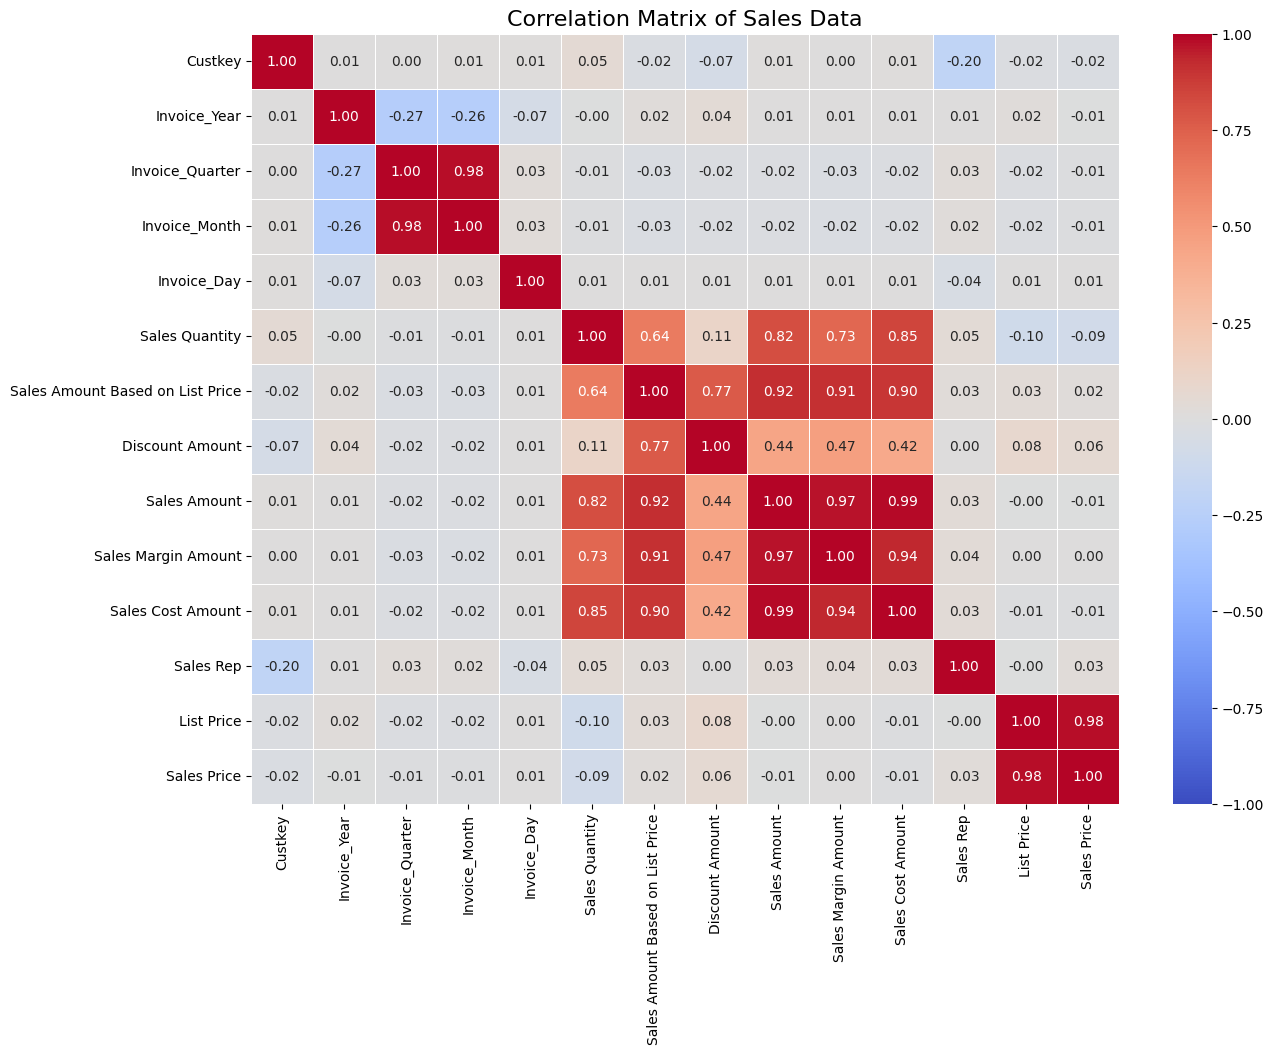

In [18]:
numeric_features = sales_data02.select_dtypes(include=['number']) # Selecting only numeric columns
corr_matrix = numeric_features.corr(method='pearson')

# Visualizing the correlation matrix
plt.figure(figsize=(14, 10))  # Setting figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix of Sales Data', size=16)
plt.show()

### Observations:

* 1 Discount Amount is highly related to Sales Amount, Sales Cost Amount, Sales Amount Based on List Price & Sales Margin Amount and moderately related to Sales Quantity.
* 2- List Price highly related to sales price and has no relations with Sales amount, Sales cost amount, Sales amount based on list price & sales margin amount.
* 3- Sales quantity is moderately related to Sales amount, discount amount, sales margin amount.
* Their is no relation Between Sales Rep and Sales Amount, Sales Margin Amount.

In [19]:
sns.set(style = 'darkgrid')

In [20]:
DaySalesInsights = sales_data01.copy()
DaySalesInsights['Invoice_Date'] = pd.to_datetime(sales_data01['Invoice Date']).dt.date

In [21]:
top10sales = DaySalesInsights.groupby('Invoice_Date')['Sales Amount'].sum().sort_values(ascending=False)
top10sales = top10sales.reset_index().head(10)
top10sales


,Invoice_Date,Sales Amount
0,2019-04-02,993701.45
1,2019-08-25,778542.15
2,2018-01-30,754544.33
3,2017-09-29,692474.86
4,2019-01-22,681163.28
5,2019-09-24,670880.57
6,2019-05-11,655724.71
7,2017-11-21,637036.48
8,2019-09-08,630143.81
9,2018-02-06,616042.00


# Top 10 Days in Sales

C:\Users\hassa\AppData\Local\Temp\ipykernel_21852\2371591217.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(y = 'Sales Amount', x = 'Invoice_Date', data = top10sales, aspect = 2,palette='turbo',kind="bar")


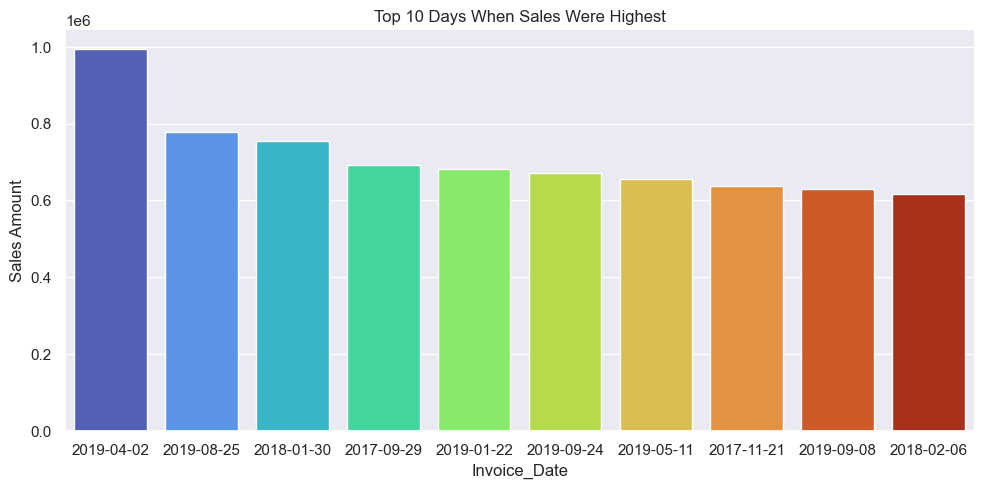

In [22]:
sns.catplot(y = 'Sales Amount', x = 'Invoice_Date', data = top10sales, aspect = 2,palette='turbo',kind="bar")
plt.title('Top 10 Days When Sales Were Highest')
top10sales[['Sales Amount']]
plt.show()